In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
gdfa = gpd.read_file(r'C:\WORK_IAAC\submissions\Internet of Buildings\IoB_WIP\IoB_Singa\masterplan landuse+osm landuse+area+conserv/masterplan landuse+osm landuse+area+conserv.shp', encoding='latin-1')
gdfa.head()

,osmid,mp_prog,far,osmlanduse,mp_plotare,heritage_n,geometry
0,453364545,RESERVE SITE,EVA,NaN,366,Former Royal Air Force (RAF) Seletar,"POLYGON ((103.87237 1.41113, 103.87233 1.41144..."
1,161718587,RESERVE SITE,EVA,NaN,1381,Former Royal Air Force (RAF) Seletar,"POLYGON ((103.87381 1.41291, 103.87352 1.41315..."
2,161718589,RESERVE SITE,EVA,NaN,131,Former Royal Air Force (RAF) Seletar,"POLYGON ((103.87364 1.41326, 103.87362 1.41328..."
3,161718592,RESERVE SITE,EVA,NaN,124,Former Royal Air Force (RAF) Seletar,"POLYGON ((103.87352 1.41315, 103.87351 1.41313..."
4,531916524,PLACE OF WORSHIP,EVA,NaN,950,Malabar Mosque,"POLYGON ((103.85984 1.30533, 103.85997 1.30514..."


In [42]:
gdfa['osmid'].nunique()

111889

In [43]:
gdfa.shape

(113784, 7)

In [54]:
# remove rows with duplicate geometries
gdfx = gdfa.dissolve(by='osmid', aggfunc='first')
gdfx.shape

(111889, 6)

In [92]:
gdfx.head()

,geometry,mp_prog,far,osmlanduse,mp_plotare,heritage_n
osmid,,,,,,
22875450,"POLYGON ((103.749 1.349, 103.749 1.349, 103.74...",RESIDENTIAL,3.5,commercial,3063,None
22886442,"POLYGON ((103.705 1.338, 103.705 1.338, 103.70...",MASS RAPID TRANSIT,NaN,None,5117,None
24680746,"POLYGON ((103.888 1.371, 103.888 1.371, 103.88...",SPORTS & RECREATION,NaN,None,4326,None
26561741,"POLYGON ((103.994 1.365, 103.994 1.365, 103.99...",PORT / AIRPORT,NaN,None,120476,None
30527021,"POLYGON ((103.853 1.303, 103.853 1.303, 103.85...",COMMERCIAL,4.2,None,5964,None


In [56]:
gdfx['geometry'].nunique()

111885

In [57]:
#yes and no to nulls in building column
gdfx['far'] = gdfx['far'].replace({'EVA': None, 'NA': None, 'SDP': None, 'LND': None})

In [61]:
gdfx['heritage_n'].unique()

array([None, 'Subordinate Courts', 'Dairy Farm', 'Clarke Quay',
       'Emerald Hill', 'Orchard Road No. 14 to 38',
       'Bras Basah Road Conservation Area', 'Singapore Cricket Club',
       'Capitol Theatre, Capitol Building and Stamford House',
       'Fullerton Building', 'Joo Chiat Conservation Area',
       'Singapore Botanic Gardens',
       'University of Singapore, Former (Bukit Timah Campus)',
       'Chinatown (Kreta Ayer)', 'Chinatown (Bukit Pasoh)',
       'China Square', 'Asia Insurance Building, Former',
       'Robinson Road No. 35 (TAS Building, Former)', 'Sentosa',
       'Sri Krishnan Temple', 'Margaret  Drive No 53', 'Southern Ridges',
       'Pulau Ubin No. 1', 'Chinatown (Tanjong Pagar)',
       'Jurong Town Hall, Former',
       'Convent of the Holy Infant Jesus, Former',
       'CLIFFORD PIER, FORMER CUSTOMS HARBOUR BRANCH BUILDING AND CHANGE ALLEY PLAZA AT COLLYER QUAY',
       'Alexandra Hospital',
       'Traffic Police Headquarters Building, Former and Form

In [59]:
gdfx['far'] = gdfx['far'].astype(float, errors='ignore')

In [73]:
gdfx.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 111889 entries, 22875450 to 1158969194
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   geometry    111889 non-null  geometry
 1   mp_prog     111675 non-null  object  
 2   far         44964 non-null   float64 
 3   osmlanduse  85478 non-null   object  
 4   mp_plotare  111889 non-null  int64   
 5   heritage_n  7773 non-null    object  
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 10.0+ MB


In [11]:
#do it only once with the initial file
gdfy.rename(columns={'LU_DESCLU_': 'mp_prog', 'LU_DESCGPR': 'far', 'fclass': 'osmlanduse', 'area': 'mp_plotarea', 'GROUP_NAME': 'heritage_name'}, inplace=True)
gdfy.head()

,osmid,mp_prog,far,osmlanduse,mp_plotarea,heritage_name,geometry
0,453364545,RESERVE SITE,EVA,NaN,366,Former Royal Air Force (RAF) Seletar,"POLYGON ((103.87237 1.41113, 103.87233 1.41144..."
1,161718587,RESERVE SITE,EVA,NaN,1381,Former Royal Air Force (RAF) Seletar,"POLYGON ((103.87381 1.41291, 103.87352 1.41315..."
2,161718589,RESERVE SITE,EVA,NaN,131,Former Royal Air Force (RAF) Seletar,"POLYGON ((103.87364 1.41326, 103.87362 1.41328..."
3,161718592,RESERVE SITE,EVA,NaN,124,Former Royal Air Force (RAF) Seletar,"POLYGON ((103.87352 1.41315, 103.87351 1.41313..."
4,531916524,PLACE OF WORSHIP,EVA,NaN,950,Malabar Mosque,"POLYGON ((103.85984 1.30533, 103.85997 1.30514..."


In [62]:
gdfb = gpd.read_file(r'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_01.shp', encoding='latin-1')
gdfb

,osmid,amenity,name,building,levels,age,height,build_prog,build_ager,floor,geometry
0,1337396,NaN,NaN,NaN,NaN,NaN,NaN,small_box,NaN,4.0,"POLYGON ((103.962 1.337, 103.961 1.337, 103.96..."
1,1362701,parking,NaN,garage,3,NaN,NaN,NaN,NaN,4.0,"POLYGON ((103.849 1.351, 103.849 1.351, 103.84..."
2,1407265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,"POLYGON ((104.031 1.407, 104.030 1.407, 104.03..."
3,1447583,NaN,20,NaN,12,NaN,70.0,NaN,NaN,4.0,"POLYGON ((103.958 1.350, 103.958 1.349, 103.95..."
4,1447589,NaN,22,NaN,12,NaN,70.0,NaN,NaN,4.0,"POLYGON ((103.958 1.349, 103.958 1.349, 103.95..."
...,...,...,...,...,...,...,...,...,...,...,...
113425,1165422507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,"POLYGON ((103.775 1.427, 103.775 1.427, 103.77..."
113426,1165422508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,"POLYGON ((103.775 1.427, 103.775 1.427, 103.77..."
113427,1165450372,NaN,NaN,NaN,29,NaN,29.0,NaN,1925-1949,4.0,"POLYGON ((103.859 1.302, 103.859 1.302, 103.85..."
113428,1165450373,NaN,NaN,NaN,29,NaN,29.0,NaN,1925-1949,4.0,"POLYGON ((103.859 1.302, 103.859 1.302, 103.85..."


In [90]:
gdfx.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [91]:
gdfx.crs = 3414

In [70]:
gdfb = gdfb.drop(columns=['floor'])

In [93]:
gdfb.head()

,osmid,amenity,name,building,levels,age,height,build_prog,build_ager,geometry
0,1337396,NaN,NaN,NaN,NaN,NaN,NaN,small_box,NaN,"POLYGON ((103.962 1.337, 103.961 1.337, 103.96..."
1,1362701,parking,NaN,garage,3,NaN,NaN,NaN,NaN,"POLYGON ((103.849 1.351, 103.849 1.351, 103.84..."
2,1407265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((104.031 1.407, 104.030 1.407, 104.03..."
3,1447583,NaN,20,NaN,12,NaN,70.0,NaN,NaN,"POLYGON ((103.958 1.350, 103.958 1.349, 103.95..."
4,1447589,NaN,22,NaN,12,NaN,70.0,NaN,NaN,"POLYGON ((103.958 1.349, 103.958 1.349, 103.95..."


In [100]:
merged = gdfx.merge(gdfb, on='osmid', how='outer', indicator=False, validate='one_to_one')
merged.head()

,osmid,geometry_x,mp_prog,far,osmlanduse,mp_plotare,heritage_n,amenity,name,building,levels,age,height,build_prog,build_ager,geometry_y
0,22875450,"POLYGON ((103.749 1.349, 103.749 1.349, 103.74...",RESIDENTIAL,3.5,commercial,3063.0,None,NaN,NaN,train_station,NaN,NaN,NaN,transport,NaN,"POLYGON ((103.749 1.349, 103.749 1.349, 103.74..."
1,22886442,"POLYGON ((103.705 1.338, 103.705 1.338, 103.70...",MASS RAPID TRANSIT,NaN,None,5117.0,None,NaN,NaN,train_station,NaN,NaN,NaN,transport,NaN,"POLYGON ((103.705 1.338, 103.705 1.338, 103.70..."
2,24680746,"POLYGON ((103.888 1.371, 103.888 1.371, 103.88...",SPORTS & RECREATION,NaN,None,4326.0,None,NaN,NaN,civic,NaN,NaN,NaN,civic,NaN,"POLYGON ((103.888 1.371, 103.888 1.371, 103.88..."
3,26561741,"POLYGON ((103.994 1.365, 103.994 1.365, 103.99...",PORT / AIRPORT,NaN,None,120476.0,None,NaN,Changi Airport Terminal 1,NaN,3,1981.0,30.0,transport,1975-1999,"POLYGON ((103.994 1.365, 103.995 1.365, 103.99..."
4,30527021,"POLYGON ((103.853 1.303, 103.853 1.303, 103.85...",COMMERCIAL,4.2,None,5964.0,None,NaN,Sim Lim Square,retail,6,NaN,NaN,deco_box,NaN,"POLYGON ((103.853 1.303, 103.853 1.303, 103.85..."


In [99]:
merged['osmid'].nunique()

113430

In [102]:
merged = merged.drop(columns=['geometry_y'])

In [106]:
merged = merged.rename(columns={'geometry_x':'geometry'})

In [108]:
#convert pandas to geopandas
gff = gpd.GeoDataFrame(merged, crs='EPSG:3414')

In [101]:
merged.shape

(113430, 16)

In [81]:
type(gdfx)

geopandas.geodataframe.GeoDataFrame

In [109]:
gff.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_02.shp', driver='ESRI Shapefile')

In [110]:
merged['mp_prog'].unique()

array(['RESIDENTIAL', 'MASS RAPID TRANSIT', 'SPORTS & RECREATION',
       'PORT / AIRPORT', 'COMMERCIAL', 'ROAD',
       'CIVIC & COMMUNITY INSTITUTION', 'COMMERCIAL & RESIDENTIAL',
       'HEALTH & MEDICAL CARE', 'EDUCATIONAL INSTITUTION',
       'PLACE OF WORSHIP', 'TRANSPORT FACILITIES', 'UTILITY',
       'BUSINESS 1', 'BUSINESS PARK', 'BUSINESS 1 - WHITE',
       'RESIDENTIAL WITH COMMERCIAL AT 1ST STOREY', 'PARK', 'OPEN SPACE',
       'RESERVE SITE', 'HOTEL', 'WHITE', 'SPECIAL USE', 'BUSINESS 2',
       None, 'BUSINESS 2 - WHITE', 'BUSINESS PARK - WHITE', 'BEACH AREA',
       'WATERBODY', 'AGRICULTURE', 'COMMERCIAL / INSTITUTION',
       'LIGHT RAPID TRANSIT', 'RESIDENTIAL / INSTITUTION', 'CEMETERY',
       nan], dtype=object)

In [111]:
merged['build_prog'].unique()

array(['transport', 'civic', 'deco_box', nan, 'glass_box', 'small_box',
       'education', 'industrial', 'medic', 'resident_high',
       'resident_low', 'religious', 'sport', 'construction_site', 'ruins'],
      dtype=object)

In [112]:
#replace building programs in column build_prog by masterplan program
build_joined = merged.copy()
ml = build_joined['mp_prog'].unique()
pl = build_joined['build_prog'].unique()

In [152]:
pl[9],pl[10],ml[0],ml[7],ml[16],ml[20],

('resident_high',
 'resident_low',
 'RESIDENTIAL',
 'COMMERCIAL & RESIDENTIAL',
 'RESIDENTIAL WITH COMMERCIAL AT 1ST STOREY',
 'HOTEL')

In [134]:
pl[0],ml[1],ml[11],ml[-4],

('transport',
 'MASS RAPID TRANSIT',
 'TRANSPORT FACILITIES',
 'LIGHT RAPID TRANSIT')

In [147]:
pl[2],ml[2],ml[3],ml[5],ml[17],ml[18],

('deco_box',
 'SPORTS & RECREATION',
 'PORT / AIRPORT',
 'ROAD',
 'PARK',
 'OPEN SPACE')

In [146]:
pl[4],ml[4],ml[14],ml[15],ml[21],ml[25],ml[26],

('glass_box',
 'COMMERCIAL',
 'BUSINESS PARK',
 'BUSINESS 1 - WHITE',
 'WHITE',
 'BUSINESS 2 - WHITE',
 'BUSINESS PARK - WHITE')

In [148]:
pl[7],ml[13],ml[19],ml[22],ml[23],ml[-6],

('industrial',
 'BUSINESS 1',
 'RESERVE SITE',
 'SPECIAL USE',
 'BUSINESS 2',
 'AGRICULTURE')

In [154]:
pl[1],ml[6],ml[-7],ml[-8],ml[-2],

('civic',
 'CIVIC & COMMUNITY INSTITUTION',
 'WATERBODY',
 'BEACH AREA',
 'CEMETERY')

In [151]:
pl[6],ml[9],ml[-3],ml[-5],

('education',
 'EDUCATIONAL INSTITUTION',
 'RESIDENTIAL / INSTITUTION',
 'COMMERCIAL / INSTITUTION')

In [153]:
pl[8],ml[8],

('medic', 'HEALTH & MEDICAL CARE')

In [155]:
pl[11],ml[10],

('religious', 'PLACE OF WORSHIP')

In [156]:
pl[12],ml[2],

('sport', 'SPORTS & RECREATION')

In [179]:
#categorize masterplan programs corresponding to building programs
recode = {    
    pl[0]:(ml[1],ml[11],ml[-4]),
    pl[1]:(ml[6],ml[-7],ml[-8],ml[-2]),
    pl[2]:(ml[2],ml[3],ml[5],ml[17],ml[18]),
    pl[4]:(ml[4],ml[14],ml[15],ml[21],ml[25],ml[26]),
    pl[6]:(ml[9],ml[-3],ml[-5]),
    pl[7]:(ml[13],ml[19],ml[22],ml[23],ml[-6]),
    pl[8]:(ml[8]),
    pl[9]:(ml[0],ml[7],ml[16],ml[20]),
    pl[11]:(ml[10]),
    pl[12]:(ml[2]),
}
recode

{'transport': ('MASS RAPID TRANSIT',
  'TRANSPORT FACILITIES',
  'LIGHT RAPID TRANSIT'),
 'civic': ('CIVIC & COMMUNITY INSTITUTION',
  'WATERBODY',
  'BEACH AREA',
  'CEMETERY'),
 'deco_box': ('SPORTS & RECREATION',
  'PORT / AIRPORT',
  'ROAD',
  'PARK',
  'OPEN SPACE'),
 'glass_box': ('COMMERCIAL',
  'BUSINESS PARK',
  'BUSINESS 1 - WHITE',
  'WHITE',
  'BUSINESS 2 - WHITE',
  'BUSINESS PARK - WHITE'),
 'education': ('EDUCATIONAL INSTITUTION',
  'RESIDENTIAL / INSTITUTION',
  'COMMERCIAL / INSTITUTION'),
 'industrial': ('BUSINESS 1',
  'RESERVE SITE',
  'SPECIAL USE',
  'BUSINESS 2',
  'AGRICULTURE'),
 'medic': 'HEALTH & MEDICAL CARE',
 'resident_high': ('RESIDENTIAL',
  'COMMERCIAL & RESIDENTIAL',
  'RESIDENTIAL WITH COMMERCIAL AT 1ST STOREY',
  'HOTEL'),
 'religious': 'PLACE OF WORSHIP',
 'sport': 'SPORTS & RECREATION'}

In [177]:
#convert dictionary to list and check selection procedure
rl = list(recode.items())
rl[1][1][2]

'BEACH AREA'

In [178]:
rl[0][1]

('MASS RAPID TRANSIT', 'TRANSPORT FACILITIES', 'LIGHT RAPID TRANSIT')

In [255]:
#check correlation of recoding, change rl index from 0 to 9
build_program_index = rl[1][0]
master_correlation = rl[1][1]
for x in master_correlation:
    print(build_program_index+" = "+x)

civic = CIVIC & COMMUNITY INSTITUTION
civic = WATERBODY
civic = BEACH AREA
civic = CEMETERY


In [249]:
#if masterplan program is:
for mp_x in master_correlation:
#replace program value from NaN to:
    build_x = build_program_index
#     mask = build_joined['mp_prog'].str.contains(mp_x, case=False)
    mask = build_joined['mp_prog'].isin(master_correlation)
    build_joined.loc[mask & ((build_joined['build_prog'].isna())), 'build_prog'] = build_x

In [250]:
#no of items before change
merged['build_prog'].value_counts().get(build_program_index, 0)

81

In [251]:
#no of items before change
build_joined['build_prog'].value_counts().get(build_program_index, 0)

81

In [355]:
#convert pandas to geopandas
build_prog = gpd.GeoDataFrame(build_joined, crs='EPSG:3414')

In [356]:
build_prog.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_03.shp', crs='EPSG:4326')

In [263]:
#zip archive shapefile
import zipfile
import os
# Define output file names
shp_path = 'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_03.shp'
zip_path = 'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_03.zip'

# Create zip file and add shapefile
with zipfile.ZipFile(zip_path, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
    for ext in ['shp', 'shx', 'dbf', 'prj']:
        filename = shp_path.replace('.shp', '.{}'.format(ext))
        zipf.write(filename, arcname=os.path.basename(filename))
    zipf.write(shp_path, arcname=os.path.basename(shp_path))

# Remove shapefile from disk
os.remove(shp_path)

C:\ProgramData\Anaconda3\lib\zipfile.py:1514: UserWarning: Duplicate name: 'buildings_03.shp'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


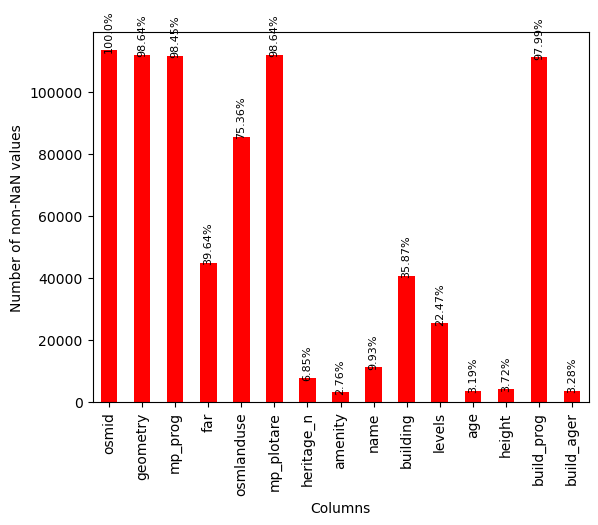

In [268]:
# get the count of non-NaN values for each column
gdfy = build_joined
counts = gdfy.count()

# create a bar plot of non-NaN counts with red color
ax = counts.plot(kind='bar', color='red')

# add the count percentage above each bar
for i, v in enumerate(counts):
    ax.text(i, v+5, str(round((v/gdfy.shape[0])*100, 2)) + '%', ha='center', rotation=90, size=8)
    
# set the x-label and y-label
ax.set_xlabel('Columns')
ax.set_ylabel('Number of non-NaN values')

plt.show()

In [357]:
build_prog = gpd.read_file(r'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_04.shp', encoding='latin-1')
build_prog.head()

,osmid,mp_prog,far,osmlanduse,mp_plotare,heritage_n,amenity,name,building,levels,age,height,build_prog,build_ager,build_foot,geometry
0,22875450,RESIDENTIAL,3.5,commercial,3063.0,NaN,NaN,NaN,train_station,NaN,NaN,NaN,transport,NaN,3063.0,"POLYGON ((103.74901 1.34852, 103.74912 1.34866..."
1,22886442,MASS RAPID TRANSIT,NaN,NaN,5117.0,NaN,NaN,NaN,train_station,NaN,NaN,NaN,transport,NaN,5117.0,"POLYGON ((103.70508 1.33839, 103.70518 1.33842..."
2,24680746,SPORTS & RECREATION,NaN,NaN,4326.0,NaN,NaN,NaN,civic,NaN,NaN,NaN,civic,NaN,4326.0,"POLYGON ((103.88808 1.37098, 103.88812 1.37102..."
3,26561741,PORT / AIRPORT,NaN,NaN,120476.0,NaN,NaN,Changi Airport Terminal 1,NaN,3,1981.0,30.0,transport,1975-1999,120476.0,"POLYGON ((103.99431 1.36489, 103.99437 1.36494..."
4,30527021,COMMERCIAL,4.2,NaN,5964.0,NaN,NaN,Sim Lim Square,retail,6,NaN,NaN,deco_box,NaN,5964.0,"POLYGON ((103.85308 1.30254, 103.85302 1.30259..."


In [266]:
build_prog = gpd.GeoDataFrame(build_joined, crs='EPSG:3414')

In [267]:
build_prog['build_cent'] = build_prog['geometry'].centroid

In [367]:
build_prog['levels'] = pd.to_numeric(build_prog['levels'], errors='coerce').fillna(0).astype(int)

In [374]:
build_prog.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 113430 entries, 0 to 113429
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   osmid       113430 non-null  int64   
 1   mp_prog     111675 non-null  object  
 2   far         44964 non-null   float64 
 3   osmlanduse  85478 non-null   object  
 4   mp_plotare  111889 non-null  float64 
 5   heritage_n  7773 non-null    object  
 6   amenity     3131 non-null    object  
 7   name        11262 non-null   object  
 8   building    40688 non-null   object  
 9   levels      113430 non-null  int32   
 10  age         3617 non-null    float64 
 11  height      4214 non-null    float64 
 12  build_prog  111147 non-null  object  
 13  build_ager  3725 non-null    object  
 14  build_foot  111889 non-null  float64 
 15  geometry    111889 non-null  geometry
 16  gfa         111888 non-null  float64 
dtypes: float64(6), geometry(1), int32(1), int64(1), object(8)
m

In [378]:
#calculate gfa from footprint * levels
build_prog['gfa'] = build_prog.apply(lambda row: row['build_foot'] * row['levels'] if row['build_foot'] is not None 
                      and row['build_foot'] != 0 and row['levels'] is not None and row['levels'] != 0 else None, axis=1)

In [382]:
#calculate gfa from plot area * gross plot ratio
build_prog.loc[build_prog['gfa'].isna(), 'gfa'] = build_prog.loc[build_prog['gfa'].isna(), 'far'] * build_prog.loc[build_prog['gfa'].isna(), 'mp_plotare']

In [406]:
build_prog['gfa'].min()

50.0

In [404]:
build_prog.loc[build_prog['gfa'] < 50, 'gfa'] = np.nan

In [407]:
build_prog['gfa'].max()

4070070.0

In [393]:
len(build_prog[build_prog['build_foot'] < 20000])

111728

In [388]:
build_prog

,osmid,mp_prog,far,osmlanduse,mp_plotare,heritage_n,amenity,name,building,levels,age,height,build_prog,build_ager,build_foot,geometry,gfa,levels_proxy
0,22875450,RESIDENTIAL,3.5,commercial,3063.0,NaN,NaN,NaN,train_station,0,NaN,NaN,transport,NaN,3063.0,"POLYGON ((103.74901 1.34852, 103.74912 1.34866...",10720.5,0
1,22886442,MASS RAPID TRANSIT,NaN,NaN,5117.0,NaN,NaN,NaN,train_station,0,NaN,NaN,transport,NaN,5117.0,"POLYGON ((103.70508 1.33839, 103.70518 1.33842...",NaN,0
2,24680746,SPORTS & RECREATION,NaN,NaN,4326.0,NaN,NaN,NaN,civic,0,NaN,NaN,civic,NaN,4326.0,"POLYGON ((103.88808 1.37098, 103.88812 1.37102...",NaN,0
3,26561741,PORT / AIRPORT,NaN,NaN,120476.0,NaN,NaN,Changi Airport Terminal 1,NaN,3,1981.0,30.0,transport,1975-1999,120476.0,"POLYGON ((103.99431 1.36489, 103.99437 1.36494...",361428.0,3
4,30527021,COMMERCIAL,4.2,NaN,5964.0,NaN,NaN,Sim Lim Square,retail,6,NaN,NaN,deco_box,NaN,5964.0,"POLYGON ((103.85308 1.30254, 103.85302 1.30259...",35784.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113425,1165422507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,None,NaN,0
113426,1165422508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,None,NaN,0
113427,1165450372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,29.0,NaN,1925-1949,NaN,None,NaN,29
113428,1165450373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,29.0,NaN,1925-1949,NaN,None,NaN,29


In [412]:
build_prog = build_prog.drop(columns=['levels_proxy'])

In [385]:
build_prog.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [342]:
build_prog.crs = 3857

In [346]:
build_prog.crs = 3414

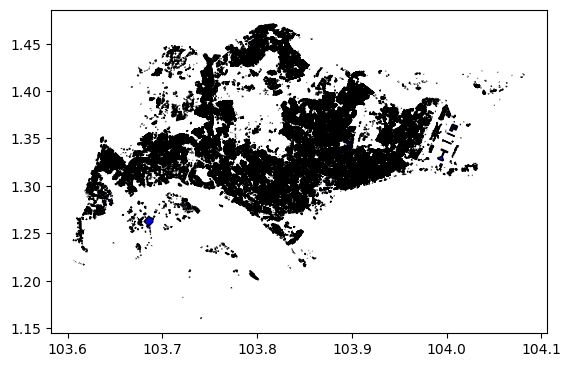

In [339]:
build_prog.plot(color='blue', edgecolor='black')

# show the plot
plt.show()

In [347]:
# build_prog['build_foot'] = build_prog.geometry.area

In [399]:
build_prog['levels'] = build_prog['levels'].replace({0: None})

In [413]:
#copy levels to levels_proxy
build_prog['levels_proxy'] = build_prog['levels']

In [419]:
#calculate levels from division of GFA by building footprint not exceedind 65 (max floors built)
mask = (build_prog['gfa'] >= 50) & (build_prog['build_foot'] >= 50)
build_prog.loc[mask, 'levels_proxy'] = build_prog['gfa'] // build_prog['build_foot']

In [430]:
count = (build_prog['levels_proxy'] >= 70).sum()
count

4

In [423]:
build_prog['levels_proxy'].min()

-1

In [429]:
build_prog['levels_proxy'].max()

70

In [428]:
#equalize skyscrapers
import random

# create a boolean mask to select values larger than 70
mask = build_prog['levels_proxy'] >= 70

# count the number of values larger than 70
count = mask.sum()

# randomly select values between 50 and 69
random_values = random.choices(range(50, 70), k=count)

# set values larger than 70 to 70 with a proportion of 3:1
build_prog.loc[mask, 'levels_proxy'] = [70 if i % 4 == 0 else random_values.pop() for i in range(count)]

In [440]:

mask1 = (build_prog['levels_proxy'] <= 5) & (~build_prog['heritage_n'].isnull())

len(build_prog[mask1])

4717

In [442]:
mask2 = (build_prog['levels_proxy'].isnull()) & (~build_prog['heritage_n'].isnull())

len(build_prog[mask2])

2465

In [444]:
#add heritage house levels_proxy = 5
random_numbers = np.random.randint(low=1, high=6, size=sum(mask2))

# Use the mask to update the 'levels_proxy' column with the random numbers
build_prog.loc[mask2, 'levels_proxy'] = random_numbers

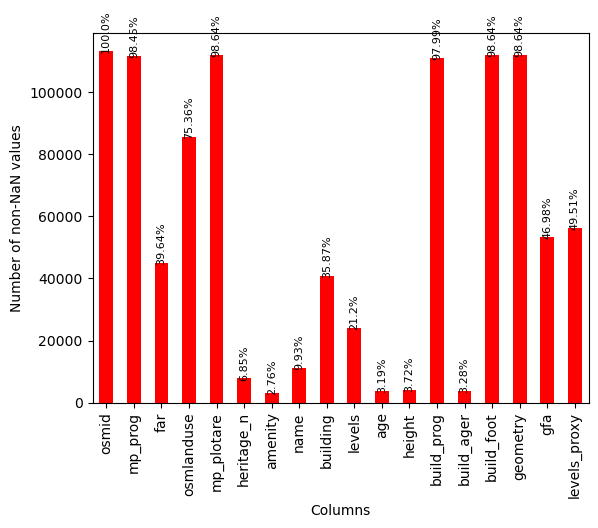

In [445]:
# get the count of non-NaN values for each column
gdfy = build_prog
counts = gdfy.count()

# create a bar plot of non-NaN counts with red color
ax = counts.plot(kind='bar', color='red')

# add the count percentage above each bar
for i, v in enumerate(counts):
    ax.text(i, v+5, str(round((v/gdfy.shape[0])*100, 2)) + '%', ha='center', rotation=90, size=8)
    
# set the x-label and y-label
ax.set_xlabel('Columns')
ax.set_ylabel('Number of non-NaN values')

plt.show()

In [446]:
build_prog.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_05.shp', crs='EPSG:4326')

C:\Users\rromu\AppData\Local\Temp\ipykernel_9396\822801641.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  build_prog.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_05.shp', crs='EPSG:4326')


In [449]:
bgm = gpd.read_file(r'C:\WORK_IAAC\submissions\Internet of Buildings\IoB_WIP\IoB_QGIS\buildings\buildings_greenmark.shp', encoding='latin-1')
bgm.head()

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,...,AWARD,HYPERLINK,LANDXADDRE,LANDYADDRE,PHOTOURL,INC_CRC,FMEL_UPD_D,ADDRESSUNI,snippet,geometry
0,yo:HA Commercial @ Tampines,FY18,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Gold,NaN,0,0,NaN,F10AF38C524E6E40,20190214162336,NaN,NaN,POINT Z (103.94177 1.33928 0.00000)
1,Volari,FY09,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Platinum,https://www.bca.gov.sg/green_mark/Sustain/Buil...,0,0,NaN,61808A22148C5DB7,20190214162336,NaN,NaN,POINT Z (103.83293 1.31489 0.00000)
2,9-11 Buckley,FY10,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Gold Plus,https://www.bca.gov.sg/green_mark/Sustain/Buil...,0,0,NaN,82A734FB534CD168,20190214162336,NaN,NaN,POINT Z (103.84033 1.31796 0.00000)
3,"The Regent Singapore, A Four Seasons Hotel",FY07,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Gold Plus,https://www.bca.gov.sg/green_mark/Sustain/Buil...,0,0,NaN,FE4C128E9D8412DF,20190214162336,NaN,NaN,POINT Z (103.82490 1.30467 0.00000)
4,Livia,FY08,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Gold Plus,https://www.bca.gov.sg/green_mark/Sustain/Buil...,0,0,NaN,09BD8DB302533B8C,20190214162336,NaN,NaN,POINT Z (103.94382 1.37234 0.00000)


In [450]:
bgm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        2105 non-null   object  
 1   descriptio  2105 non-null   object  
 2   timestamp   0 non-null      float64 
 3   begin       0 non-null      float64 
 4   end         0 non-null      float64 
 5   altitudeMo  0 non-null      float64 
 6   tessellate  2105 non-null   int64   
 7   extrude     2105 non-null   int64   
 8   visibility  2105 non-null   int64   
 9   drawOrder   0 non-null      float64 
 10  icon        0 non-null      float64 
 11  ADDRESSBLO  0 non-null      float64 
 12  ADDRESSBUI  0 non-null      float64 
 13  ADDRESSFLO  0 non-null      float64 
 14  ADDRESSPOS  2105 non-null   object  
 15  ADDRESSSTR  0 non-null      float64 
 16  ADDRESSTYP  0 non-null      float64 
 17  AWARD       2105 non-null   object  
 18  HYPERLINK   1500 non-null   object  
 19

In [452]:
#reduce columns
bgm.iloc[:, [0, 1, 17, 22, 23, 26]]

,Name,descriptio,AWARD,INC_CRC,FMEL_UPD_D,geometry
0,yo:HA Commercial @ Tampines,FY18,Gold,F10AF38C524E6E40,20190214162336,POINT Z (103.94177 1.33928 0.00000)
1,Volari,FY09,Platinum,61808A22148C5DB7,20190214162336,POINT Z (103.83293 1.31489 0.00000)
2,9-11 Buckley,FY10,Gold Plus,82A734FB534CD168,20190214162336,POINT Z (103.84033 1.31796 0.00000)
3,"The Regent Singapore, A Four Seasons Hotel",FY07,Gold Plus,FE4C128E9D8412DF,20190214162336,POINT Z (103.82490 1.30467 0.00000)
4,Livia,FY08,Gold Plus,09BD8DB302533B8C,20190214162336,POINT Z (103.94382 1.37234 0.00000)
...,...,...,...,...,...,...
2100,N1.1,FY15,Platinum,1D5749FF6C021D5D,20190214162337,POINT Z (103.67882 1.34676 0.00000)
2101,Administration Building,FY15,Platinum,1D5749FFFDAD444B,20190214162337,POINT Z (103.67882 1.34676 0.00000)
2102,School of Materials Science and Engineering (B...,FY15,Platinum,1D5749FFA6625D1B,20190214162337,POINT Z (103.67882 1.34676 0.00000)
2103,School of Mechanical & Aerospace Engineering (...,FY15,Platinum,1D5749FF98D70383,20190214162337,POINT Z (103.67882 1.34676 0.00000)


In [472]:
bgm2.crs = 3414
build_prog.crs = 3414

In [457]:
bgm.crs

<Derived Projected CRS: EPSG:3414>
Name: SVY21 / Singapore TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Singapore - onshore and offshore.
- bounds: (103.59, 1.13, 104.07, 1.47)
Coordinate Operation:
- name: Singapore Transverse Mercator
- method: Transverse Mercator
Datum: SVY21
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [460]:
bgm1 = gpd.read_file(r'C:\WORK_IAAC\submissions\Internet of Buildings\IoB_WIP\IoB_Singa\separate\only_greenmark\only_greenmark.shp', encoding='latin-1')
bgm1.head()

,osmid_left,Name_2,descriptio,ADDRESSPOS,AWARD,HYPERLINK,geometry
0,124529184,yo:HA Commercial @ Tampines,FY18,528839,Gold,NaN,"POLYGON ((103.94075 1.33870, 103.94079 1.33908..."
1,727217814,9-11 Buckley,FY10,309767,Gold Plus,https://www.bca.gov.sg/green_mark/Sustain/Buil...,"POLYGON ((103.84042 1.31835, 103.84059 1.31829..."
2,320467194,"The Regent Singapore, A Four Seasons Hotel",FY07,249715,Gold Plus,https://www.bca.gov.sg/green_mark/Sustain/Buil...,"POLYGON ((103.82428 1.30455, 103.82504 1.30501..."
3,453795749,Livia,FY08,518215,Gold Plus,https://www.bca.gov.sg/green_mark/Sustain/Buil...,"POLYGON ((103.94381 1.37256, 103.94408 1.37245..."
4,543793947,Lower Seletar Waterworks (Membrane Filtration ...,FY16,797490,Gold,https://www.bca.gov.sg/green_mark/Sustain/Buil...,"POLYGON ((103.85538 1.40045, 103.85540 1.40029..."


In [468]:
bgm2 = bgm1.dropna(subset=['AWARD'])

In [469]:
bgm2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   osmid_left  1683 non-null   int64   
 1   Name_2      1683 non-null   object  
 2   descriptio  1683 non-null   object  
 3   ADDRESSPOS  1683 non-null   object  
 4   AWARD       1683 non-null   object  
 5   HYPERLINK   1176 non-null   object  
 6   geometry    1683 non-null   geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 105.2+ KB


In [470]:
#rename columns
bgm2.rename(columns={'osmid_left': 'osmid', 'Name_2': 'gm_name', 'descriptio': 'gm_phase', 'ADDRESSPOS': 'postcode', 'AWARD': 'gm_award', 'HYPERLINK': 'gm_link'}, inplace=True)
bgm2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     1683 non-null   int64   
 1   gm_name   1683 non-null   object  
 2   gm_phase  1683 non-null   object  
 3   postcode  1683 non-null   object  
 4   gm_award  1683 non-null   object  
 5   gm_link   1176 non-null   object  
 6   geometry  1683 non-null   geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 105.2+ KB


C:\Users\rromu\AppData\Local\Temp\ipykernel_9396\2081528711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgm2.rename(columns={'osmid_left': 'osmid', 'Name_2': 'gm_name', 'descriptio': 'gm_phase', 'ADDRESSPOS': 'postcode', 'AWARD': 'gm_award', 'HYPERLINK': 'gm_link'}, inplace=True)


In [500]:
bgm3 = pd.DataFrame(bgm2)
bgm4 = bgm3.drop(columns=bgm3.columns[-1])

In [501]:
joint = build_prog.merge(bgm4, on='osmid', how='left')
joint

,osmid,mp_prog,far,osmlanduse,mp_plotare,heritage_n,amenity,name,building,levels,...,build_ager,build_foot,geometry,gfa,levels_proxy,gm_name,gm_phase,postcode,gm_award,gm_link
0,22875450,RESIDENTIAL,3.5,commercial,3063.0,NaN,NaN,NaN,train_station,None,...,NaN,3063.0,"POLYGON ((103.749 1.349, 103.749 1.349, 103.74...",10720.5,3.0,NaN,NaN,NaN,NaN,NaN
1,22886442,MASS RAPID TRANSIT,NaN,NaN,5117.0,NaN,NaN,NaN,train_station,None,...,NaN,5117.0,"POLYGON ((103.705 1.338, 103.705 1.338, 103.70...",NaN,None,NaN,NaN,NaN,NaN,NaN
2,24680746,SPORTS & RECREATION,NaN,NaN,4326.0,NaN,NaN,NaN,civic,None,...,NaN,4326.0,"POLYGON ((103.888 1.371, 103.888 1.371, 103.88...",NaN,None,NaN,NaN,NaN,NaN,NaN
3,26561741,PORT / AIRPORT,NaN,NaN,120476.0,NaN,NaN,Changi Airport Terminal 1,NaN,3,...,1975-1999,120476.0,"POLYGON ((103.994 1.365, 103.994 1.365, 103.99...",361428.0,3.0,Changi Airport Terminal 1,FY13,819642,Gold,NaN
4,26561741,PORT / AIRPORT,NaN,NaN,120476.0,NaN,NaN,Changi Airport Terminal 1,NaN,3,...,1975-1999,120476.0,"POLYGON ((103.994 1.365, 103.994 1.365, 103.99...",361428.0,3.0,Changi Airport Terminal 1,FY13,819642,Gold,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114027,1165422507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN
114028,1165422508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN
114029,1165450372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,...,1925-1949,NaN,None,NaN,29,NaN,NaN,NaN,NaN,NaN
114030,1165450373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,...,1925-1949,NaN,None,NaN,29,NaN,NaN,NaN,NaN,NaN


In [502]:
joint.shape

(114032, 23)

In [503]:
# joint.rename(columns={'geometry_x': 'geometry'}, inplace=True)
#convert pandas to geopandas
joint = gpd.GeoDataFrame(joint, crs='EPSG:3414')

In [504]:
#dissolve green mark duplicating data in dataset
jointx = joint.dissolve(by='osmid', aggfunc='first')
jointx.shape

(113430, 22)

In [493]:
jointx.drop(columns=jointx.columns[-1])

,geometry,mp_prog,far,osmlanduse,mp_plotare,heritage_n,amenity,name,building,levels,...,build_prog,build_ager,build_foot,gfa,levels_proxy,gm_name,gm_phase,postcode,gm_award,gm_link
osmid,,,,,,,,,,,,,,,,,,,,,
1337396,None,None,NaN,None,NaN,None,None,None,None,None,...,small_box,None,NaN,NaN,None,None,None,None,None,None
1362701,None,None,NaN,None,NaN,None,parking,None,garage,3,...,None,None,NaN,NaN,3,None,None,None,None,None
1407265,None,None,NaN,None,NaN,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,None,None
1447583,None,None,NaN,None,NaN,None,None,20,None,12,...,None,None,NaN,NaN,12,None,None,None,None,None
1447589,None,None,NaN,None,NaN,None,None,22,None,12,...,None,None,NaN,NaN,12,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165422507,None,None,NaN,None,NaN,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,None,None
1165422508,None,None,NaN,None,NaN,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,None,None
1165450372,None,None,NaN,None,NaN,None,None,None,None,29,...,None,1925-1949,NaN,NaN,29,None,None,None,None,None


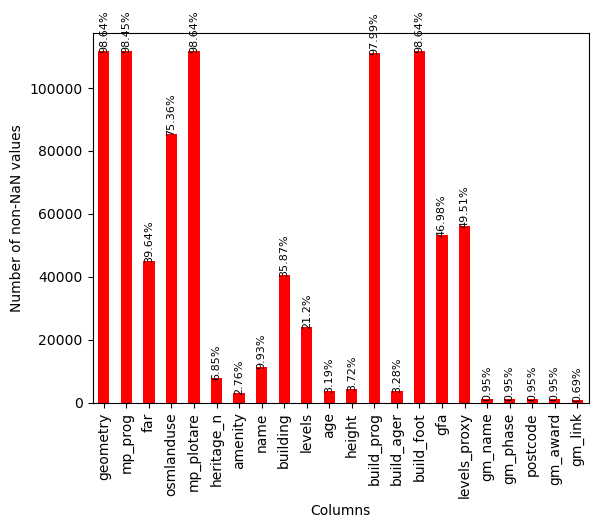

In [505]:
# get the count of non-NaN values for each column
gdfy = jointx
counts = gdfy.count()

# create a bar plot of non-NaN counts with red color
ax = counts.plot(kind='bar', color='red')

# add the count percentage above each bar
for i, v in enumerate(counts):
    ax.text(i, v+5, str(round((v/gdfy.shape[0])*100, 2)) + '%', ha='center', rotation=90, size=8)
    
# set the x-label and y-label
ax.set_xlabel('Columns')
ax.set_ylabel('Number of non-NaN values')

plt.show()

In [506]:
jointx.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 113430 entries, 1337396 to 1165450374
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   geometry      111889 non-null  geometry
 1   mp_prog       111675 non-null  object  
 2   far           44964 non-null   float64 
 3   osmlanduse    85478 non-null   object  
 4   mp_plotare    111889 non-null  float64 
 5   heritage_n    7773 non-null    object  
 6   amenity       3131 non-null    object  
 7   name          11262 non-null   object  
 8   building      40688 non-null   object  
 9   levels        24044 non-null   object  
 10  age           3617 non-null    float64 
 11  height        4214 non-null    float64 
 12  build_prog    111147 non-null  object  
 13  build_ager    3725 non-null    object  
 14  build_foot    111889 non-null  float64 
 15  gfa           53294 non-null   float64 
 16  levels_proxy  56162 non-null   object  
 17  gm_name       10

In [507]:
jointx.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_06.shp', crs='EPSG:4326')

C:\Users\rromu\AppData\Local\Temp\ipykernel_9396\182196821.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  jointx.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_06.shp', crs='EPSG:4326')
